In [1]:
from quspin.operators import hamiltonian # Hamiltonians and operators
from quspin.basis import spin_basis_1d # Hilbert space spin basis
import numpy as np # generic math functions
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def Ham(tau, Delta):
    L=1 # system size
    def ramp(t):
        return 2*(t-1)/tau
    ramp_args=[]

    basis = spin_basis_1d(L)
    
    J_z = [[Delta,i] for i in range(L)]
    # static and dynamic lists
    static = [["z",J_z]]
    dynamic =[["x",J_z,ramp,ramp_args]]
    
    H = hamiltonian(static,dynamic,basis=basis,dtype=np.float_, check_symm=False, check_herm=False)
    return H

In [3]:
def ramp(t,tau):
        return 2*(t-1)/tau

In [76]:
tau=2.0
tf=1.0+tau
ti=1.0 -tau
Delta=1.0
H=Ham(tau, Delta)
#psi0=V0[:,0] #ground state of t=0 hamiltonian
t_arr=np.linspace(ti,tf,20)
energy_gs=np.zeros(len(t_arr))
energy_es=np.zeros(len(t_arr))
for i in range(len(t_arr)):
    E,V=H.eigh(time=t_arr[i])
    energy_gs[i]=E[0]
    energy_es[i]=E[1]

In [80]:
tau=0.25
tf=1.0+tau
ti=1.0 -tau
Delta=1.0
H=Ham(tau, Delta)
#psi0=V0[:,0] #ground state of t=0 hamiltonian
t_arr_tauhalf=np.linspace(ti,tf,20)
energy_gs_tauhalf=np.zeros(len(t_arr))
energy_es_tauhalf=np.zeros(len(t_arr))
for i in range(len(t_arr)):
    E,V=H.eigh(time=t_arr_tauhalf[i])
    energy_gs_tauhalf[i]=E[0]
    energy_es_tauhalf[i]=E[1]

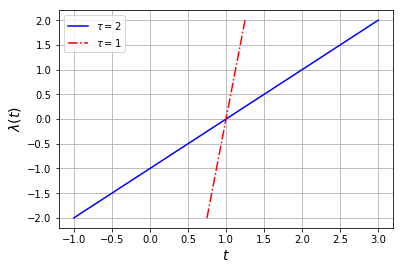

In [88]:
tau=2.0
plt.plot(t_arr, ramp(t_arr,tau), 'b-', label=r'$\tau=2$')
plt.plot(t_arr_tauhalf, ramp(t_arr_tauhalf,0.25),'r-.', label=r'$\tau=1$')
plt.xlabel(r'$t$', fontsize=14)
plt.ylabel(r'$\lambda(t)$', fontsize=14)
plt.grid()
plt.legend()

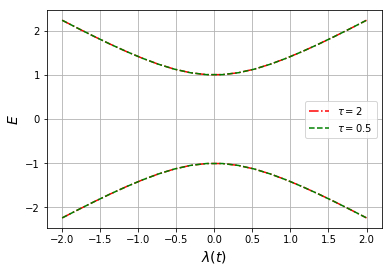

In [81]:
plt.plot(ramp(t_arr,2.0), energy_gs, 'r-.', label= r'$\tau=2$')
plt.plot(ramp(t_arr, 2.0), energy_es, 'r-.')#, label= 'ES')
plt.plot(ramp(t_arr_tauhalf,0.25), energy_gs_tauhalf, 'g--', label= r'$\tau=0.5$')
plt.plot(ramp(t_arr_tauhalf, 0.25), energy_es_tauhalf, 'g--')#, label= 'ES')
plt.xlabel(r'$\lambda(t)$', fontsize=14)
plt.legend(loc='best')
plt.grid()
plt.ylabel(r'$E$', fontsize=14)

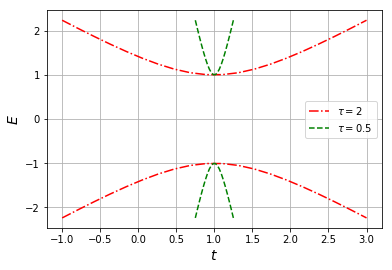

In [89]:
plt.plot(t_arr, energy_gs, 'r-.', label= r'$\tau=2$')
plt.plot(t_arr, energy_es, 'r-.')#, label= 'ES')
plt.plot(t_arr_tauhalf, energy_gs_tauhalf, 'g--', label= r'$\tau=0.5$')
plt.plot(t_arr_tauhalf, energy_es_tauhalf, 'g--')#, label= 'ES')
plt.xlabel(r'$t$', fontsize=14)
plt.legend(loc='best')
plt.grid()
plt.ylabel(r'$E$', fontsize=14)

In [11]:
def Ham_CD(tau, Delta):
    L=1 # system size
    def ramp_x(t):
        return 2*(t-1)/tau
    ramp_args=[]

    def ramp_y(t):
        return tau/(tau**2+ 4*(t-1)**2)
    
    
    basis = spin_basis_1d(L)
    
    J_z = [[Delta,i] for i in range(L)]
    # static and dynamic lists
    static = [["z",J_z]]
    dynamic =[["x",J_z,ramp_x,ramp_args], ["y",J_z,ramp_y,ramp_args]]
    
    H = hamiltonian(static,dynamic,basis=basis,dtype=np.complex_, check_symm=False, check_herm=False)
    return H

In [14]:
tau=2.0
Delta=1.0
H_cd= Ham_CD(tau, Delta)
print H_cd(time=0.0) #sanity check

  (0, 0)	(-1+0j)
  (0, 1)	(-1+0.25j)
  (1, 0)	(-1-0.25j)
  (1, 1)	(1+0j)


In [61]:
tau=2.0
Delta=1.0
tf=1.0+tau
ti=1.0 -tau
H=Ham_CD(tau, Delta)
#psi0=V0[:,0] #ground state of t=0 hamiltonian
t_arr_del2=np.linspace(ti,tf,20)
energy_gs_cd_del2=np.zeros(len(t_arr_del2))
energy_es_cd_del2=np.zeros(len(t_arr_del2))
for i in range(len(t_arr_del2)):
    E,V=H.eigh(time=t_arr_del2[i])
    energy_gs_cd_del2[i]=E[0]
    energy_es_cd_del2[i]=E[1]

In [67]:
tau=0.5
Delta=1.0
tf=1.0+tau
ti=1.0 -tau
H=Ham_CD(tau, Delta)
#psi0=V0[:,0] #ground state of t=0 hamiltonian
t_arr_del1=np.linspace(ti,tf,20)
energy_gs_cd_del1=np.zeros(len(t_arr_del1))
energy_es_cd_del1=np.zeros(len(t_arr_del1))
for i in range(len(t_arr_del1)):
    E,V=H.eigh(time=t_arr_del1[i])
    energy_gs_cd_del1[i]=E[0]
    energy_es_cd_del1[i]=E[1]

In [66]:
tau=0.25
Delta=1.0
tf=1.0+tau
ti=1.0 -tau
H=Ham_CD(tau, Delta)
#psi0=V0[:,0] #ground state of t=0 hamiltonian
t_arr_delquart=np.linspace(ti,tf,20)
energy_gs_cd_delquart=np.zeros(len(t_arr_delquart))
energy_es_cd_delquart=np.zeros(len(t_arr_delquart))
for i in range(len(t_arr_delquart)):
    E,V=H.eigh(time=t_arr_delquart[i])
    energy_gs_cd_delquart[i]=E[0]
    energy_es_cd_delquart[i]=E[1]

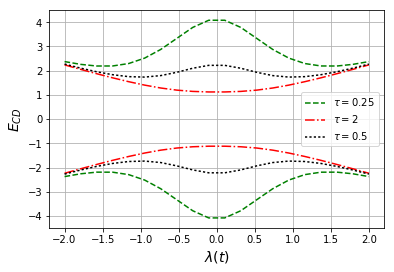

In [70]:
plt.ylabel(r'$E_{CD}$', fontsize=14)
plt.plot(ramp(t_arr_delquart,0.25), energy_gs_cd_delquart, 'g--', label= r'$\tau=0.25$')
plt.plot(ramp(t_arr_delquart, 0.25), energy_es_cd_delquart, 'g--')#, label= '')
plt.plot(ramp(t_arr_del2,2.0), energy_gs_cd_del2, 'r-.', label= r'$\tau=2$')
plt.plot(ramp(t_arr_del2,2.0), energy_es_cd_del2, 'r-.')
plt.plot(ramp(t_arr_del1,0.5), energy_gs_cd_del1, 'k:', label= r'$\tau=0.5$')
plt.plot(ramp(t_arr_del1,0.5), energy_es_cd_del1, 'k:')
plt.xlabel(r'$\lambda(t)$', fontsize=14)
plt.legend(loc='best')
plt.grid()
plt.savefig("energy_cd_2level_sys.eps")

In [91]:
def Ham_gauge_potn(tau, Delta):
    L=1 # system size
    
    ramp_args=[]

    def ramp_y(t):
        return tau/(tau**2+ 4*(t-1)**2)
    
    
    basis = spin_basis_1d(L)
    
    J_z = [[Delta,i] for i in range(L)]
    # static and dynamic lists
    static = []
    dynamic =[["y",J_z,ramp_y,ramp_args]]
    
    H = hamiltonian(static,dynamic,basis=basis,dtype=np.complex_, check_symm=False, check_herm=False)
    return H

In [92]:
tau=2.0
Delta=1.0
tf=1.0+tau
ti=1.0 -tau
H=Ham_gauge_potn(tau, Delta)
#psi0=V0[:,0] #ground state of t=0 hamiltonian
t_arr_del2=np.linspace(ti,tf,20)
energy_gs_cd_del2=np.zeros(len(t_arr_del2))
energy_es_cd_del2=np.zeros(len(t_arr_del2))
for i in range(len(t_arr_del2)):
    E,V=H.eigh(time=t_arr_del2[i])
    energy_gs_cd_del2[i]=E[0]
    energy_es_cd_del2[i]=E[1]

In [94]:
tau=0.5
Delta=1.0
tf=1.0+tau
ti=1.0 -tau
H=Ham_CD(tau, Delta)
#psi0=V0[:,0] #ground state of t=0 hamiltonian
t_arr_del1=np.linspace(ti,tf,20)
energy_gs_cd_del1=np.zeros(len(t_arr_del1))
energy_es_cd_del1=np.zeros(len(t_arr_del1))
for i in range(len(t_arr_del1)):
    E,V=H.eigh(time=t_arr_del1[i])
    energy_gs_cd_del1[i]=E[0]
    energy_es_cd_del1[i]=E[1]

In [95]:
tau=0.25
Delta=1.0
tf=1.0+tau
ti=1.0 -tau
H=Ham_CD(tau, Delta)
#psi0=V0[:,0] #ground state of t=0 hamiltonian
t_arr_delquart=np.linspace(ti,tf,20)
energy_gs_cd_delquart=np.zeros(len(t_arr_delquart))
energy_es_cd_delquart=np.zeros(len(t_arr_delquart))
for i in range(len(t_arr_delquart)):
    E,V=H.eigh(time=t_arr_delquart[i])
    energy_gs_cd_delquart[i]=E[0]
    energy_es_cd_delquart[i]=E[1]

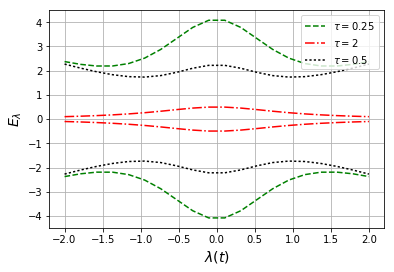

In [99]:
plt.ylabel(r'$E_{\lambda}$', fontsize=14)
plt.plot(ramp(t_arr_delquart,0.25), energy_gs_cd_delquart, 'g--', label= r'$\tau=0.25$')
plt.plot(ramp(t_arr_delquart, 0.25), energy_es_cd_delquart, 'g--')#, label= '')
plt.plot(ramp(t_arr_del2,2.0), energy_gs_cd_del2, 'r-.', label= r'$\tau=2$')
plt.plot(ramp(t_arr_del2,2.0), energy_es_cd_del2, 'r-.')
plt.plot(ramp(t_arr_del1,0.5), energy_gs_cd_del1, 'k:', label= r'$\tau=0.5$')
plt.plot(ramp(t_arr_del1,0.5), energy_es_cd_del1, 'k:')
plt.xlabel(r'$\lambda(t)$', fontsize=14)
plt.legend(loc='best')
plt.grid()
plt.savefig("energy_gauge_potn_2level.eps")